In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('./data/training_set_VU_DM.csv')

In [65]:
df['search_date'] = pd.to_datetime(df['date_time']).dt.date
df['search_time'] = pd.to_datetime(df['date_time']).dt.time

In [68]:
df['day_of_week'] = df['search_date'].apply(lambda x: x.weekday())
df['day_of_week_str'] = df['search_date'].apply(lambda x: x.strftime('%A'))

In [66]:
df_test = pd.read_csv('./data/test_set_VU_DM.csv')

In [67]:
df_test['search_date'] = pd.to_datetime(df_test['date_time']).dt.date
df_test['search_time'] = pd.to_datetime(df_test['date_time']).dt.time

In [12]:
df_test.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

In [4]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [6]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [11]:
df.isnull()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
2,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
3,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,False,False,True,False
4,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958343,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958344,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958345,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [15]:
print ("Number of unique searches")
len(df[['srch_id']].groupby('srch_id').count())

Number of unique searches


199795

In [73]:
print ("Number of searches with a click")
df_clicked = df[df['click_bool'] == 1]
len(df_clicked[['srch_id']].groupby('srch_id').count())

Number of searches with a click


199795

In [74]:
print ("Number of searches with a book")
df_booked = df[df['booking_bool'] == 1]
len(df_booked[['srch_id']].groupby('srch_id').count())

Number of searches with a book


138390

In [20]:
print ("Number of unique searches")
search_counts = df[['srch_id', 'date_time']].groupby('srch_id').count()
search_counts.describe()

Number of unique searches


,date_time
count,199795.000000
mean,24.817173
std,9.113335
min,5.000000
25%,18.000000
50%,29.000000
75%,32.000000
max,38.000000


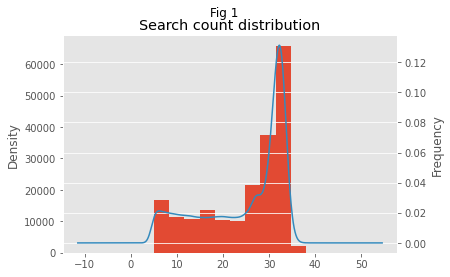

In [25]:
ax = search_counts.date_time.plot(kind='hist')
search_counts.date_time.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Search count distribution')
plt.suptitle('Fig 1')
plt.xlabel('Search count')
plt.ylabel('Frequency')
#plt.xticks(rotation=5)
plt.show()

In [36]:
df[['srch_id', 'visitor_location_country_id', 'date_time']]

,srch_id,visitor_location_country_id,date_time
0,1,187,2013-04-04 08:32:15
1,1,187,2013-04-04 08:32:15
2,1,187,2013-04-04 08:32:15
3,1,187,2013-04-04 08:32:15
4,1,187,2013-04-04 08:32:15
...,...,...,...
4958342,332785,219,2013-06-30 19:55:18
4958343,332785,219,2013-06-30 19:55:18
4958344,332785,219,2013-06-30 19:55:18
4958345,332785,219,2013-06-30 19:55:18


In [41]:
print ("Number of unique searches per country of visitor")
search_visitor_country = df[['srch_id', 'visitor_location_country_id']].groupby(['visitor_location_country_id']).srch_id.nunique()
search_visitor_country = pd.DataFrame(search_visitor_country)
search_visitor_country.describe()

Number of unique searches per country of visitor


,srch_id
count,210.000000
mean,951.404762
std,8065.894174
min,1.000000
25%,5.000000
50%,17.000000
75%,92.500000
max,114186.000000


In [43]:
search_location_country = df[['srch_id', 'srch_destination_id']].groupby(['srch_destination_id']).srch_id.nunique()
search_location_country = pd.DataFrame(search_location_country)
search_location_country.describe()

,srch_id
count,18127.000000
mean,11.021956
std,49.124948
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,2464.000000


In [71]:
search_week_day = df[['srch_id', 'day_of_week_str']]
search_week_day

,srch_id,day_of_week_str
0,1,Thursday
1,1,Thursday
2,1,Thursday
3,1,Thursday
4,1,Thursday
...,...,...
4958342,332785,Sunday
4958343,332785,Sunday
4958344,332785,Sunday
4958345,332785,Sunday


In [91]:
print ("Searches by day of the week")
search_week_day = df[['srch_id', 'day_of_week_str']].groupby(['day_of_week_str']).srch_id.nunique()
search_week_day = pd.DataFrame(search_week_day)
search_week_day = search_week_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
search_week_day.reset_index(inplace=True)
search_week_day.rename(columns={"srch_id": "Searches"}, inplace=True)
search_week_day

Searches by day of the week


,day_of_week_str,Searches
0,Monday,31022
1,Tuesday,30972
2,Wednesday,31555
3,Thursday,30060
4,Friday,27475
5,Saturday,22137
6,Sunday,26574


In [90]:
print ("Searches with a booking by day of the week")
search_week_day_b = df_booked[['srch_id', 'day_of_week_str']].groupby(['day_of_week_str']).srch_id.nunique()
search_week_day_b = pd.DataFrame(search_week_day_b)
search_week_day_b = search_week_day_b.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
search_week_day_b.reset_index(inplace=True)
search_week_day_b.rename(columns={"srch_id": "Searches with a booking"}, inplace=True)
search_week_day_b

Searches with a booking by day of the week


,day_of_week_str,Searches with a booking
0,Monday,21314
1,Tuesday,21205
2,Wednesday,21939
3,Thursday,20949
4,Friday,19352
5,Saturday,15414
6,Sunday,18217


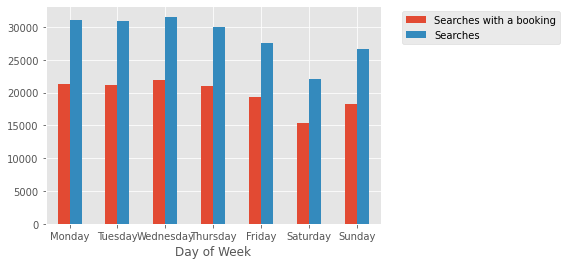

In [97]:
df_by_day_of_week = pd.merge(search_week_day_b, search_week_day, on='day_of_week_str')
df_by_day_of_week.plot.bar(x='day_of_week_str', logy=False)
plt.xticks(rotation=0)
plt.xlabel('Day of Week')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

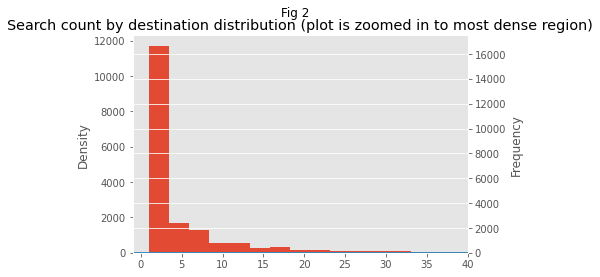

In [62]:
ax = search_location_country.srch_id.plot(kind='hist', bins=1000)
search_location_country.srch_id.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Search count by destination distribution (plot is zoomed in to most dense region)')
plt.suptitle('Fig 2')
plt.xlabel('Search count by destination')
plt.ylabel('Frequency')
plt.axis([-1, 40, 0, 17500])
#plt.xticks(rotation=5)
plt.show()

# EDA 

We found that in the training set there are 199795 searches. Searches have a minimum of 5 results and a maximum of 38 results. The mean of results per search is 24.81 with an standard deviation of 9.11. As seen on Fig 1, most of the searches output more than 29 results. All searched had at least one click given by the user among the results. However, not all the searches had a booking. A total of 138390 (69.26%) searches in the training set resulted in a booking. 

**Analysis by geographic location**: Visitors countries are variate. A total of 210 countries are found. The world has a total of 195 countries. Hence, we hiphotesize that Expedia maybe subdivides big countries by region. The maximum number of searches in a country is 114186. The mininum number of searches is 1. Since countries are mapped as IDs we are not able to recognize which are these specific countries. On the other hand, visitors searched for 18127 different destinations. The minimum nummber of times a destination was searched is 1 and the maximum is 2464. However, most destinations (75%) where searched only 6 times. The latter hinted us that destinations searches are very variant. This can be further seen on Fig 2. 

**Temporal Analysis**: 